#INTRODUCTION
Ecommerce generates vast amount of data and this data can be used as an opportunity to undersatnd customer behaviour, optimize marketing strategies, operational efficiency, etc.

We will be working on the data provided by the Brazillian Ecommerce platform "Olist".

The dataset has information of 100k orders from 2016 to 2018 made at multiple marketplaces in Brazil. Its features allows viewing an order from multiple dimensions: from order status, price, payment and freight performance to customer location, product attributes and finally reviews written by customers.


#PROBLEM STATEMENT
The objective is to explore the data and create a master dataset
and then generate synthetic data using the models we've made.

#IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


#PROFILING AND PREPROCESSING THE DATASETS

CUSTOMER DATASET

In [2]:
customers = pd.read_csv("/kaggle/input/brazilian-ecommerce/olist_customers_dataset.csv")

In [3]:
customers.shape

(99441, 5)

In [4]:
customers.info()

#gotta change integer to categorical datatype (customer_zip_code_prefix)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [5]:
customers.nunique()

#customer_id and customer_unique_id -> different features (customer_unique_id -> assigned to customer on signing in)

customer_id                 99441
customer_unique_id          96096
customer_zip_code_prefix    14994
customer_city                4119
customer_state                 27
dtype: int64

In [6]:
customers.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [7]:
customers.duplicated().sum()

0

In [8]:
customers['customer_zip_code_prefix'] = customers['customer_zip_code_prefix'].astype("category")

#integer -> categorical

In [9]:
customers.rename(columns={'customer_zip_code_prefix':'zipcode'}, inplace=True)

In [10]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   customer_id         99441 non-null  object  
 1   customer_unique_id  99441 non-null  object  
 2   zipcode             99441 non-null  category
 3   customer_city       99441 non-null  object  
 4   customer_state      99441 non-null  object  
dtypes: category(1), object(4)
memory usage: 3.8+ MB


In [11]:
customers.head()

,customer_id,customer_unique_id,zipcode,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


GEOLOCATION DATASET

In [12]:
geolocation = pd.read_csv("/kaggle/input/brazilian-ecommerce/olist_geolocation_dataset.csv")

In [13]:
geolocation.shape

(1000163, 5)

In [14]:
geolocation.info()

#geolocation_zip_code_prefix needs to go from integer to categorical datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [15]:
geolocation.nunique()

geolocation_zip_code_prefix     19015
geolocation_lat                717360
geolocation_lng                717613
geolocation_city                 8011
geolocation_state                  27
dtype: int64

In [16]:
geolocation.isnull().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

In [17]:
geolocation.duplicated().sum()

261831

In [18]:
geolocation["geolocation_zip_code_prefix"] = geolocation['geolocation_zip_code_prefix'].astype('category')

#integer -> categorical

In [19]:
geolocation.rename(columns={'geolocation_zip_code_prefix':'zipcode'}, inplace=True)

In [20]:
geolocation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column             Non-Null Count    Dtype   
---  ------             --------------    -----   
 0   zipcode            1000163 non-null  category
 1   geolocation_lat    1000163 non-null  float64 
 2   geolocation_lng    1000163 non-null  float64 
 3   geolocation_city   1000163 non-null  object  
 4   geolocation_state  1000163 non-null  object  
dtypes: category(1), float64(2), object(2)
memory usage: 33.1+ MB


In [21]:
geolocation.head()

,zipcode,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [22]:
#geolocation['coordinate'] = geolocation.apply(lambda row: (row['geolocation_lat'], row['geolocation_lng']), axis=1)

ORDER ITEMS

In [23]:
order_items = pd.read_csv('/kaggle/input/brazilian-ecommerce/olist_order_items_dataset.csv')

In [24]:
order_items.shape

(112650, 7)

In [25]:
order_items.info()

#shipping_limit_date should be datetime datatype
#order_item_id should be string datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [26]:
order_items.isnull().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [27]:
order_items.duplicated().sum()

0

In [28]:
order_items['shipping_limit_date'] = pd.to_datetime(order_items['shipping_limit_date'])

#integer -> datetime

In [29]:
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


In [30]:
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [31]:
order_items['order_item_id'].value_counts()

1     98666
2      9803
3      2287
4       965
5       460
6       256
7        58
8        36
9        28
10       25
11       17
12       13
13        8
14        7
15        5
16        3
17        3
18        3
19        3
20        3
21        1
Name: order_item_id, dtype: int64

In [32]:
order_items_new = order_items.groupby(by = ['order_id', 'product_id','price','freight_value','seller_id','shipping_limit_date']).agg({'product_id':'count'})

order_items_new.columns = ['qty']

#rows have been duplicated with only exception being order_item_id (if an order has 3 items, the same order is repeated 3 times in the dataset)
#so aggregating and making a new column 'count' which has the number of items in an order.

In [33]:
order_items_new['qty'].value_counts().sort_index()

1     95337
2      5382
3       953
4       390
5       168
6       172
7         4
8         2
9         2
10        5
11        1
12        2
13        1
14        2
15        2
20        2
Name: qty, dtype: int64

In [34]:
order_items_new.reset_index(inplace = True)

In [35]:
order_items_new.nunique()

order_id               98666
product_id             32951
price                   5968
freight_value           6999
seller_id               3095
shipping_limit_date    93318
qty                       16
dtype: int64

In [36]:
order_items_new.shape

(102425, 7)

In [37]:
order_items_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102425 entries, 0 to 102424
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             102425 non-null  object        
 1   product_id           102425 non-null  object        
 2   price                102425 non-null  float64       
 3   freight_value        102425 non-null  float64       
 4   seller_id            102425 non-null  object        
 5   shipping_limit_date  102425 non-null  datetime64[ns]
 6   qty                  102425 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 5.5+ MB


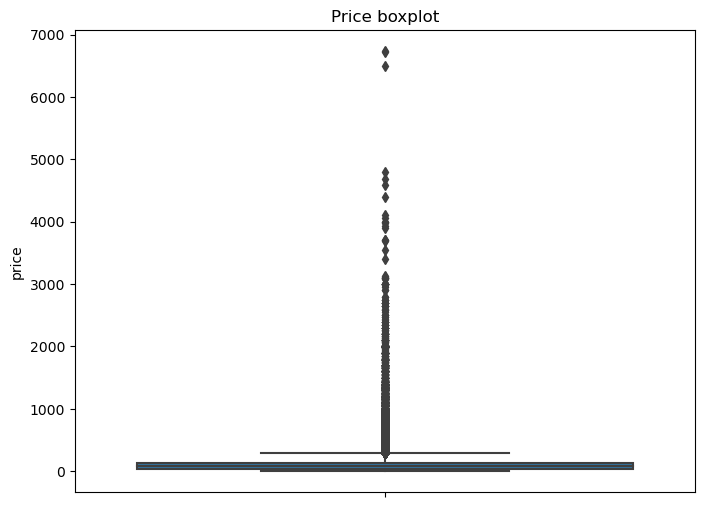

In [38]:
plt.figure(figsize=(8,6))
sns.boxplot(data=order_items_new, y='price')
plt.title('Price boxplot')
plt.ylabel('price')
plt.show()

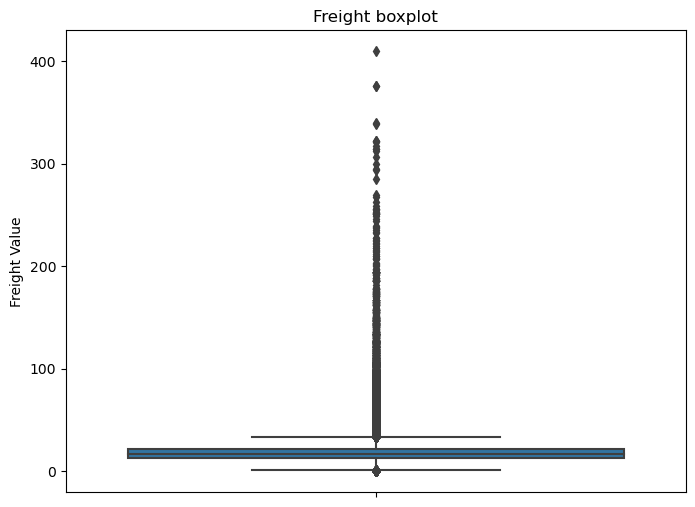

In [39]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=order_items_new, y='freight_value')
plt.title('Freight boxplot')
plt.ylabel('Freight Value')
plt.show()

<Axes: xlabel='price', ylabel='freight_value'>

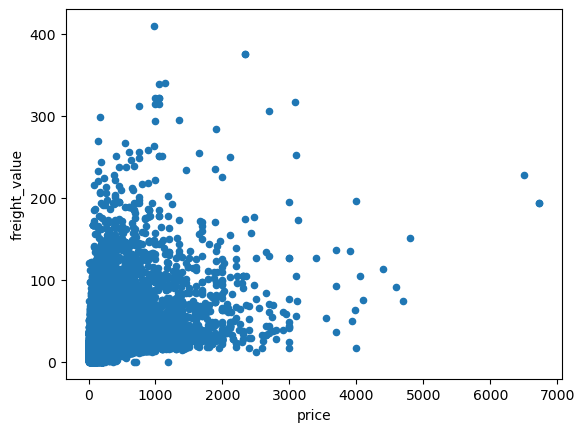

In [40]:
order_items_new.plot.scatter(x = 'price', y = 'freight_value')

PAYMENTS

In [41]:
payments = pd.read_csv('/kaggle/input/brazilian-ecommerce/olist_order_payments_dataset.csv')

In [42]:
payments.shape

(103886, 5)

In [43]:
payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [44]:
payments['payment_type'].value_counts()

credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: payment_type, dtype: int64

In [45]:
payments.nunique()

order_id                99440
payment_sequential         29
payment_type                5
payment_installments       24
payment_value           29077
dtype: int64

In [46]:
payments.isnull().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [47]:
payments.duplicated().sum()

0

In [48]:
payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [49]:
payments['payment_sequential'].value_counts().sort_values(ascending=False)

1     99360
2      3039
3       581
4       278
5       170
6       118
7        82
8        54
9        43
10       34
11       29
12       21
13       13
14       10
15        8
18        6
19        6
16        6
17        6
21        4
20        4
22        3
26        2
24        2
23        2
25        2
29        1
28        1
27        1
Name: payment_sequential, dtype: int64

In [50]:
payments.drop(["payment_sequential", "payment_type", "payment_installments"], axis=1, inplace=True)

In [51]:
payments.duplicated().sum()

615

In [52]:
payments = payments.groupby('order_id')['payment_value'].sum().reset_index()

In [53]:
payments.shape

(99440, 2)

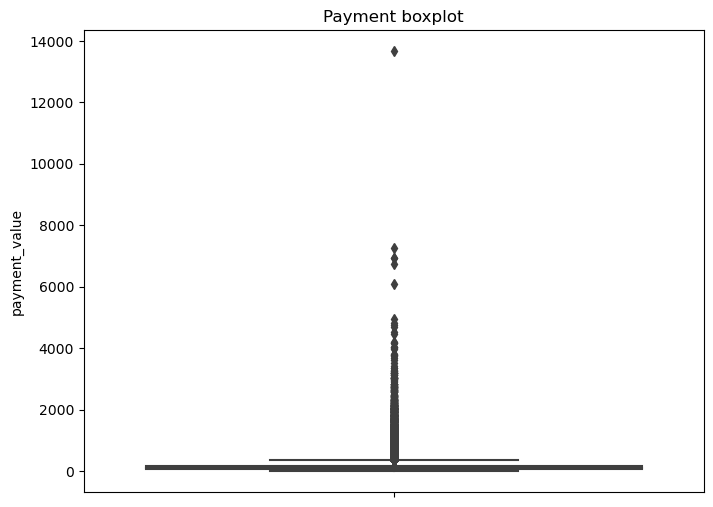

In [54]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=payments, y='payment_value')
plt.title('Payment boxplot')
plt.ylabel('payment_value')
plt.show()

REVIEWS

In [55]:
reviews = pd.read_csv('/kaggle/input/brazilian-ecommerce/olist_order_reviews_dataset.csv')

In [56]:
reviews.shape

(99224, 7)

In [57]:
reviews.info()

#review_creation_date and review_answer_timestamp should be datetime dataype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [58]:
reviews.nunique()

review_id                  98410
order_id                   98673
review_score                   5
review_comment_title        4527
review_comment_message     36159
review_creation_date         636
review_answer_timestamp    98248
dtype: int64

In [59]:
reviews.isnull().sum()

#gotta check null values

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [60]:
reviews.duplicated().sum()

0

In [61]:
reviews['review_creation_date'] = pd.to_datetime(reviews['review_creation_date'])
reviews['review_answer_timestamp'] = pd.to_datetime(reviews['review_answer_timestamp'])

#object -> datetime

In [62]:
reviews.drop(['review_id'], axis=1, inplace=True)

In [63]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   order_id                 99224 non-null  object        
 1   review_score             99224 non-null  int64         
 2   review_comment_title     11568 non-null  object        
 3   review_comment_message   40977 non-null  object        
 4   review_creation_date     99224 non-null  datetime64[ns]
 5   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 4.5+ MB


In [64]:
reviews.head()

,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18,2018-01-18 21:46:59
1,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10,2018-03-11 03:05:13
2,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17,2018-02-18 14:36:24
3,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06
4,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01,2018-03-02 10:26:53


In [65]:
reviews_nullvals = reviews[reviews["review_comment_title"].isna() & reviews["review_comment_message"].isna()]
reviews_nullvals.shape

#rows with null values

(56518, 6)

In [66]:
reviews_onenull = (reviews[reviews["review_comment_title"].isna() | reviews["review_comment_message"].isna()])
reviews_onenull.shape

#rows with at least one value that is not null

(89385, 6)

ORDERS

In [67]:
orders = pd.read_csv('/kaggle/input/brazilian-ecommerce/olist_orders_dataset.csv')

In [68]:
orders.shape

(99441, 8)

In [69]:
orders.info()

#attributes no. 3,4,5,6,7 need to be changed to datetime datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [70]:
orders.nunique()

order_id                         99441
customer_id                      99441
order_status                         8
order_purchase_timestamp         98875
order_approved_at                90733
order_delivered_carrier_date     81018
order_delivered_customer_date    95664
order_estimated_delivery_date      459
dtype: int64

In [71]:
orders.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [72]:
orders.duplicated().sum()

0

In [73]:
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders['order_approved_at'] = pd.to_datetime(orders['order_approved_at'])
orders['order_delivered_carrier_date'] = pd.to_datetime(orders['order_delivered_carrier_date'])
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'])
orders['order_estimated_delivery_date'] = pd.to_datetime(orders['order_estimated_delivery_date'])

#object -> datetime

In [74]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [75]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


In [76]:
orders['order_status'].value_counts()

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

In [77]:
#orders[orders['order_status'] == 'cancelled'].head()

In [78]:
unapproved = orders[orders['order_approved_at'].isnull()]
unapproved.head()

#rows with null values in the order_approved_at column

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaT,NaT,NaT,2018-09-12
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaT,NaT,NaT,2018-10-17
1868,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,NaT,NaT,NaT,2017-04-10
2029,8d4c637f1accf7a88a4555f02741e606,b1dd715db389a2077f43174e7a675d07,canceled,2018-08-29 16:27:49,NaT,NaT,NaT,2018-09-13
2161,7a9d4c7f9b068337875b95465330f2fc,7f71ae48074c0cfec9195f88fcbfac55,canceled,2017-05-01 16:12:39,NaT,NaT,NaT,2017-05-30


In [79]:
unapproved.order_status.value_counts().reset_index()

#value counts of unapproved orders w.r.t order_status

,index,order_status
0,canceled,141
1,delivered,14
2,created,5


In [80]:
unapproved_delivered = ((orders['order_approved_at'].isna()) & (orders['order_status'] == 'delivered'))

#checked unapproved orders which were delivered

orders.loc[unapproved_delivered, "order_approved_at"]= orders.loc[unapproved_delivered, "order_purchase_timestamp"]
orders.loc[unapproved_delivered,:]

#assuming that order_approved_at is the same as the order purchase time for orders which were not approved but still delivered.

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
5323,e04abd8149ef81b95221e88f6ed9ab6a,2127dc6603ac33544953ef05ec155771,delivered,2017-02-18 14:40:00,2017-02-18 14:40:00,2017-02-23 12:04:47,2017-03-01 13:25:33,2017-03-17
16567,8a9adc69528e1001fc68dd0aaebbb54a,4c1ccc74e00993733742a3c786dc3c1f,delivered,2017-02-18 12:45:31,2017-02-18 12:45:31,2017-02-23 09:01:52,2017-03-02 10:05:06,2017-03-21
19031,7013bcfc1c97fe719a7b5e05e61c12db,2941af76d38100e0f8740a374f1a5dc3,delivered,2017-02-18 13:29:47,2017-02-18 13:29:47,2017-02-22 16:25:25,2017-03-01 08:07:38,2017-03-17
22663,5cf925b116421afa85ee25e99b4c34fb,29c35fc91fc13fb5073c8f30505d860d,delivered,2017-02-18 16:48:35,2017-02-18 16:48:35,2017-02-22 11:23:10,2017-03-09 07:28:47,2017-03-31
23156,12a95a3c06dbaec84bcfb0e2da5d228a,1e101e0daffaddce8159d25a8e53f2b2,delivered,2017-02-17 13:05:55,2017-02-17 13:05:55,2017-02-22 11:23:11,2017-03-02 11:09:19,2017-03-20
26800,c1d4211b3dae76144deccd6c74144a88,684cb238dc5b5d6366244e0e0776b450,delivered,2017-01-19 12:48:08,2017-01-19 12:48:08,2017-01-25 14:56:50,2017-01-30 18:16:01,2017-03-01
38290,d69e5d356402adc8cf17e08b5033acfb,68d081753ad4fe22fc4d410a9eb1ca01,delivered,2017-02-19 01:28:47,2017-02-19 01:28:47,2017-02-23 03:11:48,2017-03-02 03:41:58,2017-03-27
39334,d77031d6a3c8a52f019764e68f211c69,0bf35cac6cc7327065da879e2d90fae8,delivered,2017-02-18 11:04:19,2017-02-18 11:04:19,2017-02-23 07:23:36,2017-03-02 16:15:23,2017-03-22
48401,7002a78c79c519ac54022d4f8a65e6e8,d5de688c321096d15508faae67a27051,delivered,2017-01-19 22:26:59,2017-01-19 22:26:59,2017-01-27 11:08:05,2017-02-06 14:22:19,2017-03-16
61743,2eecb0d85f281280f79fa00f9cec1a95,a3d3c38e58b9d2dfb9207cab690b6310,delivered,2017-02-17 17:21:55,2017-02-17 17:21:55,2017-02-22 11:42:51,2017-03-03 12:16:03,2017-03-20


In [81]:
no_carrier = orders[orders['order_delivered_carrier_date'].isna()]
no_carrier.head()

#Reviewing rows with no carrier dates

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaT,NaT,2018-08-21
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaT,NaT,2017-10-03
266,8e24261a7e58791d10cb1bf9da94df5c,64a254d30eed42cd0e6c36dddb88adf0,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57,NaT,NaT,2017-12-05
324,d3c8851a6651eeff2f73b0e011ac45d0,957f8e082185574de25992dc659ebbc0,processing,2016-10-05 22:44:13,2016-10-06 15:51:05,NaT,NaT,2016-12-09


In [82]:
no_carrier.order_status.value_counts()

#checking order status of orders with no carriers

unavailable    609
canceled       550
invoiced       314
processing     301
created          5
approved         2
delivered        2
Name: order_status, dtype: int64

In [83]:
no_carrier.query("order_status == 'delivered'")

#orders delivered with no carrier, only one of the two has a delivery time

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
73222,2aa91108853cecb43c84a5dc5b277475,afeb16c7f46396c0ed54acb45ccaaa40,delivered,2017-09-29 08:52:58,2017-09-29 09:07:16,NaT,2017-11-20 19:44:47,2017-11-14
92643,2d858f451373b04fb5c984a1cc2defaf,e08caf668d499a6d643dafd7c5cc498a,delivered,2017-05-25 23:22:43,2017-05-25 23:30:16,NaT,NaT,2017-06-23


In [84]:
delivered_noncarrier = (orders['order_delivered_carrier_date'].isnull()) & (orders['order_status'] == 'delivered')

orders.loc[delivered_noncarrier, "order_delivered_carrier_date"] = orders.loc[delivered_noncarrier, "order_purchase_timestamp"]
orders.loc[delivered_noncarrier, :]

#carrier time for delivered orders -> purchase time

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
73222,2aa91108853cecb43c84a5dc5b277475,afeb16c7f46396c0ed54acb45ccaaa40,delivered,2017-09-29 08:52:58,2017-09-29 09:07:16,2017-09-29 08:52:58,2017-11-20 19:44:47,2017-11-14
92643,2d858f451373b04fb5c984a1cc2defaf,e08caf668d499a6d643dafd7c5cc498a,delivered,2017-05-25 23:22:43,2017-05-25 23:30:16,2017-05-25 23:22:43,NaT,2017-06-23


In [85]:
no_deldate = orders[orders["order_delivered_customer_date"].isnull()]

no_deldate.head()

#orders with no customer delivery date

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaT,2018-06-28
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaT,NaT,2018-08-21
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaT,NaT,2017-10-03
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaT,2018-02-07


In [86]:
no_deldate.order_status.value_counts()

#count of each type of order status for orders with no delivery date

shipped        1107
canceled        619
unavailable     609
invoiced        314
processing      301
delivered         8
created           5
approved          2
Name: order_status, dtype: int64

In [87]:
no_deldate.query("order_status == 'delivered'")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
3002,2d1e2d5bf4dc7227b3bfebb81328c15f,ec05a6d8558c6455f0cbbd8a420ad34f,delivered,2017-11-28 17:44:07,2017-11-28 17:56:40,2017-11-30 18:12:23,NaT,2017-12-18
20618,f5dd62b788049ad9fc0526e3ad11a097,5e89028e024b381dc84a13a3570decb4,delivered,2018-06-20 06:58:43,2018-06-20 07:19:05,2018-06-25 08:05:00,NaT,2018-07-16
43834,2ebdfc4f15f23b91474edf87475f108e,29f0540231702fda0cfdee0a310f11aa,delivered,2018-07-01 17:05:11,2018-07-01 17:15:12,2018-07-03 13:57:00,NaT,2018-07-30
79263,e69f75a717d64fc5ecdfae42b2e8e086,cfda40ca8dd0a5d486a9635b611b398a,delivered,2018-07-01 22:05:55,2018-07-01 22:15:14,2018-07-03 13:57:00,NaT,2018-07-30
82868,0d3268bad9b086af767785e3f0fc0133,4f1d63d35fb7c8999853b2699f5c7649,delivered,2018-07-01 21:14:02,2018-07-01 21:29:54,2018-07-03 09:28:00,NaT,2018-07-24
92643,2d858f451373b04fb5c984a1cc2defaf,e08caf668d499a6d643dafd7c5cc498a,delivered,2017-05-25 23:22:43,2017-05-25 23:30:16,2017-05-25 23:22:43,NaT,2017-06-23
97647,ab7c89dc1bf4a1ead9d6ec1ec8968a84,dd1b84a7286eb4524d52af4256c0ba24,delivered,2018-06-08 12:09:39,2018-06-08 12:36:39,2018-06-12 14:10:00,NaT,2018-06-26
98038,20edc82cf5400ce95e1afacc25798b31,28c37425f1127d887d7337f284080a0f,delivered,2018-06-27 16:09:12,2018-06-27 16:29:30,2018-07-03 19:26:00,NaT,2018-07-19


In [88]:
avg_delivery_time = (orders['order_delivered_customer_date'] - orders['order_delivered_carrier_date']).mean()
avg_delivery_time

Timedelta('9 days 07:56:37.872558978')

In [89]:
delivered_nodeldate = (orders['order_delivered_customer_date'].isnull() & (orders['order_status'] == 'delivered'))

#delivered orders without delivery date

In [90]:
orders.loc[delivered_nodeldate,"order_delivered_customer_date"] = orders.loc[delivered_nodeldate,"order_delivered_carrier_date"] + avg_delivery_time
orders.loc[delivered_nodeldate,:]

#replacing orders without customer delivery date with average delivery time + carrier date

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
3002,2d1e2d5bf4dc7227b3bfebb81328c15f,ec05a6d8558c6455f0cbbd8a420ad34f,delivered,2017-11-28 17:44:07,2017-11-28 17:56:40,2017-11-30 18:12:23,2017-12-10 02:09:00.872558978,2017-12-18
20618,f5dd62b788049ad9fc0526e3ad11a097,5e89028e024b381dc84a13a3570decb4,delivered,2018-06-20 06:58:43,2018-06-20 07:19:05,2018-06-25 08:05:00,2018-07-04 16:01:37.872558978,2018-07-16
43834,2ebdfc4f15f23b91474edf87475f108e,29f0540231702fda0cfdee0a310f11aa,delivered,2018-07-01 17:05:11,2018-07-01 17:15:12,2018-07-03 13:57:00,2018-07-12 21:53:37.872558978,2018-07-30
79263,e69f75a717d64fc5ecdfae42b2e8e086,cfda40ca8dd0a5d486a9635b611b398a,delivered,2018-07-01 22:05:55,2018-07-01 22:15:14,2018-07-03 13:57:00,2018-07-12 21:53:37.872558978,2018-07-30
82868,0d3268bad9b086af767785e3f0fc0133,4f1d63d35fb7c8999853b2699f5c7649,delivered,2018-07-01 21:14:02,2018-07-01 21:29:54,2018-07-03 09:28:00,2018-07-12 17:24:37.872558978,2018-07-24
92643,2d858f451373b04fb5c984a1cc2defaf,e08caf668d499a6d643dafd7c5cc498a,delivered,2017-05-25 23:22:43,2017-05-25 23:30:16,2017-05-25 23:22:43,2017-06-04 07:19:20.872558978,2017-06-23
97647,ab7c89dc1bf4a1ead9d6ec1ec8968a84,dd1b84a7286eb4524d52af4256c0ba24,delivered,2018-06-08 12:09:39,2018-06-08 12:36:39,2018-06-12 14:10:00,2018-06-21 22:06:37.872558978,2018-06-26
98038,20edc82cf5400ce95e1afacc25798b31,28c37425f1127d887d7337f284080a0f,delivered,2018-06-27 16:09:12,2018-06-27 16:29:30,2018-07-03 19:26:00,2018-07-13 03:22:37.872558978,2018-07-19


In [91]:
orders['order_estimated_delivery_date'] = orders['order_estimated_delivery_date'].apply(lambda x: x.replace(hour=15, minute=0, second=0))

#creating a general timestamp of 3pm for the order_estimated_delivery_date_column

In [92]:
orders['carrier_to_customer_hrs'] = (orders['order_delivered_customer_date'] - orders['order_delivered_carrier_date'])/dt.timedelta(hours=1)
orders['approval_to_carrier_hrs'] = (orders['order_delivered_carrier_date'] - orders['order_approved_at'])/dt.timedelta(hours=1)
orders['purchase_to_approval_hrs'] = (orders['order_approved_at'] - orders['order_purchase_timestamp'])/dt.timedelta(hours=1)
orders['expected_delivery_hrs'] = (orders['order_estimated_delivery_date'] - orders['order_purchase_timestamp'])/dt.timedelta(hours=1)
orders['actual_delivery_hrs'] = (orders['order_delivered_customer_date'] - orders['order_purchase_timestamp'])/dt.timedelta(hours=1)
orders['delivery_hours_delta'] = (orders['expected_delivery_hrs'] - orders['actual_delivery_hrs'])

#different durations in hours for all orders (can be used for logistics predictions)

In [93]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,carrier_to_customer_hrs,approval_to_carrier_hrs,purchase_to_approval_hrs,expected_delivery_hrs,actual_delivery_hrs,delivery_hours_delta
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 15:00:00,145.503611,56.795833,0.178333,388.057500,202.477778,185.579722
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 15:00:00,288.945833,11.109167,30.713889,474.306389,330.768889,143.537500
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 15:00:00,220.274722,4.910278,0.276111,654.353056,225.461111,428.891944
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 15:00:00,226.811944,89.900000,0.298056,643.531667,317.010000,326.521667
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 15:00:00,46.507778,21.434722,1.030556,305.689167,68.973056,236.716111


In [94]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99295 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97660 non-null  datetime64[ns]
 6   order_delivered_customer_date  96484 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
 8   carrier_to_customer_hrs        96484 non-null  float64       
 9   approval_to_carrier_hrs        97660 non-null  float64       
 10  purchase_to_approval_hrs       99295 non-null  float64       
 11  expected_delive

PRODUCTS

In [95]:
products = pd.read_csv('/kaggle/input/brazilian-ecommerce/olist_products_dataset.csv')

In [96]:
products.shape

(32951, 9)

In [97]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [98]:
products.nunique()

product_id                    32951
product_category_name            73
product_name_lenght              66
product_description_lenght     2960
product_photos_qty               19
product_weight_g               2204
product_length_cm                99
product_height_cm               102
product_width_cm                 95
dtype: int64

In [99]:
products.isnull().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [100]:
products['product_id'].duplicated().sum()

0

In [101]:
products[products['product_weight_g'].isnull()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
8578,09ff539a621711667c43eba6a3bd8466,bebes,60.0,865.0,3.0,NaN,NaN,NaN,NaN
18851,5eb564652db742ff8f28759cd8d2652a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [102]:
products.dropna(subset=['product_weight_g'], inplace=True)

#dropping the rows where the product dimensions weights are not given.

In [103]:
products.rename(columns={"product_name_lenght":"product_name_length", "product_description_lenght":"product_description_length"}, inplace=True)
products.columns

#renaming

Index(['product_id', 'product_category_name', 'product_name_length',
       'product_description_length', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm'],
      dtype='object')

In [104]:
products.describe()

,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32340.000000,32340.000000,32340.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476592,771.492393,2.188961,2276.472488,30.815078,16.937661,23.196728
std,10.245699,635.124831,1.736787,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [105]:
products.isnull().sum()

product_id                      0
product_category_name         609
product_name_length           609
product_description_length    609
product_photos_qty            609
product_weight_g                0
product_length_cm               0
product_height_cm               0
product_width_cm                0
dtype: int64

In [106]:
products.head()

,product_id,product_category_name,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [107]:
products['product_volume_cm3']=products.product_length_cm * products.product_height_cm * products.product_width_cm

#adding a product volume column which may influence the delivery time, delay, freight value and other logistics cost

In [108]:
products['product_volumetric_weight']= (products['product_volume_cm3']/5000)

#product volumetric weight in volumetric kilograms (used for logistics pricing)

In [109]:
products.head()

,product_id,product_category_name,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_volume_cm3,product_volumetric_weight
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,2240.0,0.4480
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,10800.0,2.1600
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,2430.0,0.4860
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,2704.0,0.5408
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,4420.0,0.8840


SELLERS

In [110]:
sellers = pd.read_csv('/kaggle/input/brazilian-ecommerce/olist_sellers_dataset.csv')

In [111]:
sellers.shape

(3095, 4)

In [112]:
sellers.info()

#nned to change zip code from integer to categorical

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [113]:
sellers.nunique()

seller_id                 3095
seller_zip_code_prefix    2246
seller_city                611
seller_state                23
dtype: int64

In [114]:
sellers.isnull().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [115]:
sellers.duplicated().sum()

0

In [116]:
sellers['seller_zip_code_prefix'] = sellers['seller_zip_code_prefix'].astype('category')

#integer -> categorical

In [117]:
sellers.rename(columns={'seller_zip_code_prefix':'zipcode'}, inplace=True)

In [118]:
sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   seller_id     3095 non-null   object  
 1   zipcode       3095 non-null   category
 2   seller_city   3095 non-null   object  
 3   seller_state  3095 non-null   object  
dtypes: category(1), object(3)
memory usage: 160.8+ KB


In [119]:
sellers.head()

,seller_id,zipcode,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


PRODUCT CATEGORIES

In [120]:
category_names = pd.read_csv('/kaggle/input/brazilian-ecommerce/product_category_name_translation.csv')

In [121]:
category_names.shape

(71, 2)

In [122]:
category_names.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [123]:
category_names.nunique()

product_category_name            71
product_category_name_english    71
dtype: int64

In [124]:
category_names.isnull().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

In [125]:
category_names.duplicated().sum()

0

In [126]:
category_names.rename(columns = {'product_category_name_english':'product_category'}, inplace= True)

category_names.columns


Index(['product_category_name', 'product_category'], dtype='object')

In [127]:
category_names.head(71)

,product_category_name,product_category
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
...,...,...
66,flores,flowers
67,artes_e_artesanato,arts_and_craftmanship
68,fraldas_higiene,diapers_and_hygiene
69,fashion_roupa_infanto_juvenil,fashion_childrens_clothes


MERGING DATASETS

Customers and geolocation dataframes

In [128]:
zipcode_avg_coordinates = geolocation.groupby('zipcode')['geolocation_lat', 'geolocation_lng'].mean().reset_index()

#calculating the mean longitude and latitude for each unique zipcode

/tmp/ipykernel_32/2937194131.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  zipcode_avg_coordinates = geolocation.groupby('zipcode')['geolocation_lat', 'geolocation_lng'].mean().reset_index()


In [129]:
customers = customers.merge(zipcode_avg_coordinates, on='zipcode', how='left')
customers.head()

#merged customers and geolocation dataframe on the basis of their zipcodes.

,customer_id,customer_unique_id,zipcode,customer_city,customer_state,geolocation_lat,geolocation_lng
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.498489,-47.396929
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,-23.727992,-46.542848
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,-23.531642,-46.656289
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,-23.499702,-46.185233
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,-22.975100,-47.142925


In [130]:
customers['customer_coordinate'] = customers.apply(lambda row: (row['geolocation_lat'], row['geolocation_lng']), axis=1)

#creating coordinates using the latitudes and longitudes

In [131]:
customers.head()

,customer_id,customer_unique_id,zipcode,customer_city,customer_state,geolocation_lat,geolocation_lng,customer_coordinate
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.498489,-47.396929,"(-20.498488755380297, -47.396929485900976)"
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,-23.727992,-46.542848,"(-23.72799221530055, -46.54284778999086)"
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,-23.531642,-46.656289,"(-23.531641584683715, -46.656288753249086)"
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,-23.499702,-46.185233,"(-23.499702301795004, -46.18523295889001)"
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,-22.975100,-47.142925,"(-22.97510045616461, -47.142925230302296)"


In [132]:
customers.shape

(99441, 8)

In [133]:
customers.nunique()

customer_id            99441
customer_unique_id     96096
zipcode                14994
customer_city           4119
customer_state            27
geolocation_lat        14837
geolocation_lng        14837
customer_coordinate    14838
dtype: int64

In [134]:
customers.head()

,customer_id,customer_unique_id,zipcode,customer_city,customer_state,geolocation_lat,geolocation_lng,customer_coordinate
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.498489,-47.396929,"(-20.498488755380297, -47.396929485900976)"
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,-23.727992,-46.542848,"(-23.72799221530055, -46.54284778999086)"
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,-23.531642,-46.656289,"(-23.531641584683715, -46.656288753249086)"
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,-23.499702,-46.185233,"(-23.499702301795004, -46.18523295889001)"
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,-22.975100,-47.142925,"(-22.97510045616461, -47.142925230302296)"


In [135]:
customers.rename(columns={"zipcode":"customer_zipcode"}, inplace=True)

In [136]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer_id          99441 non-null  object 
 1   customer_unique_id   99441 non-null  object 
 2   customer_zipcode     99441 non-null  int64  
 3   customer_city        99441 non-null  object 
 4   customer_state       99441 non-null  object 
 5   geolocation_lat      99163 non-null  float64
 6   geolocation_lng      99163 non-null  float64
 7   customer_coordinate  99441 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 6.8+ MB


Products and category dataframes

In [137]:
products = products.merge(category_names, on='product_category_name', how='left')
products.head()

#merged on the basis of product category name

,product_id,product_category_name,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_volume_cm3,product_volumetric_weight,product_category
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,2240.0,0.4480,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,10800.0,2.1600,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,2430.0,0.4860,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,2704.0,0.5408,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,4420.0,0.8840,housewares


In [138]:
products.drop(columns = ['product_category_name', 'product_name_length', 'product_description_length'], axis=1, inplace=True)

In [139]:
products.head()

,product_id,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_volume_cm3,product_volumetric_weight,product_category
0,1e9e8ef04dbcff4541ed26657ea517e5,1.0,225.0,16.0,10.0,14.0,2240.0,0.4480,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,1.0,1000.0,30.0,18.0,20.0,10800.0,2.1600,art
2,96bd76ec8810374ed1b65e291975717f,1.0,154.0,18.0,9.0,15.0,2430.0,0.4860,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,1.0,371.0,26.0,4.0,26.0,2704.0,0.5408,baby
4,9dc1a7de274444849c219cff195d0b71,4.0,625.0,20.0,17.0,13.0,4420.0,0.8840,housewares


In [140]:
products.shape

(32949, 9)

Sellers and Geolocation

In [141]:
sellers = sellers.merge(zipcode_avg_coordinates, on='zipcode', how='left')
sellers.head()
#merged on basis of zipcodes again

,seller_id,zipcode,seller_city,seller_state,geolocation_lat,geolocation_lng
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,-22.893848,-47.061337
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP,-22.383437,-46.947927
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ,-22.909572,-43.177703
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP,-23.657242,-46.612831
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP,-22.964803,-46.534419


In [142]:
sellers['seller_coordinate'] = sellers.apply(lambda row: (row['geolocation_lat'], row['geolocation_lng']), axis=1)

In [143]:
sellers.shape

(3095, 7)

In [144]:
sellers.head()

,seller_id,zipcode,seller_city,seller_state,geolocation_lat,geolocation_lng,seller_coordinate
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,-22.893848,-47.061337,"(-22.89384803253408, -47.06133702244195)"
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP,-22.383437,-46.947927,"(-22.38343651404282, -46.947926542619655)"
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ,-22.909572,-43.177703,"(-22.909572437655488, -43.177703112986904)"
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP,-23.657242,-46.612831,"(-23.65724198521615, -46.612830839593656)"
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP,-22.964803,-46.534419,"(-22.964802783097714, -46.53441931528525)"


In [145]:
sellers.rename(columns={'zipcode':'seller_zipcode'}, inplace=True)

Orders, order items and order reviews dataframes

In [146]:
orders = orders.merge(order_items_new, on='order_id', how='left') \
               .merge(reviews, on='order_id', how='left')

orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,carrier_to_customer_hrs,approval_to_carrier_hrs,...,price,freight_value,seller_id,shipping_limit_date,qty,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 15:00:00,145.503611,56.795833,...,29.99,8.72,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,1.0,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 15:00:00,288.945833,11.109167,...,118.70,22.76,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,1.0,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08,2018-08-08 18:37:50
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 15:00:00,220.274722,4.910278,...,159.90,19.22,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,1.0,5.0,NaN,NaN,2018-08-18,2018-08-22 19:07:58
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 15:00:00,226.811944,89.900000,...,45.00,27.20,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,1.0,5.0,NaN,O produto foi exatamente o que eu esperava e e...,2017-12-03,2017-12-05 19:21:58
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 15:00:00,46.507778,21.434722,...,19.90,8.72,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,1.0,5.0,NaN,NaN,2018-02-17,2018-02-18 13:02:51


In [147]:
orders.drop(columns=['review_comment_title','review_comment_message','review_creation_date','review_answer_timestamp'], axis=1, inplace=True)

In [148]:
orders.shape

(103805, 21)

In [149]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,carrier_to_customer_hrs,approval_to_carrier_hrs,...,expected_delivery_hrs,actual_delivery_hrs,delivery_hours_delta,product_id,price,freight_value,seller_id,shipping_limit_date,qty,review_score
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 15:00:00,145.503611,56.795833,...,388.057500,202.477778,185.579722,87285b34884572647811a353c7ac498a,29.99,8.72,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,1.0,4.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 15:00:00,288.945833,11.109167,...,474.306389,330.768889,143.537500,595fac2a385ac33a80bd5114aec74eb8,118.70,22.76,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,1.0,4.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 15:00:00,220.274722,4.910278,...,654.353056,225.461111,428.891944,aa4383b373c6aca5d8797843e5594415,159.90,19.22,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,1.0,5.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 15:00:00,226.811944,89.900000,...,643.531667,317.010000,326.521667,d0b61bfb1de832b15ba9d266ca96e5b0,45.00,27.20,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,1.0,5.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 15:00:00,46.507778,21.434722,...,305.689167,68.973056,236.716111,65266b2da20d04dbe00c5c2d3bb7859e,19.90,8.72,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,1.0,5.0


In [150]:
orders.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'carrier_to_customer_hrs', 'approval_to_carrier_hrs',
       'purchase_to_approval_hrs', 'expected_delivery_hrs',
       'actual_delivery_hrs', 'delivery_hours_delta', 'product_id', 'price',
       'freight_value', 'seller_id', 'shipping_limit_date', 'qty',
       'review_score'],
      dtype='object')

MASTER DATASET

In [151]:
Master_df = orders.merge(payments, on="order_id", how='left') \
                  .merge(customers, on='customer_id', how='left') \
                  .merge(products, on='product_id', how='left') \
                  .merge(sellers, on='seller_id', how= 'left')

In [152]:
import math

def haversine_distance(lat1, lon1, lat2, lon2):
    # Convert latitude and longitude from degrees to radians
    lat1_rad = math.radians(lat1)
    lon1_rad = math.radians(lon1)
    lat2_rad = math.radians(lat2)
    lon2_rad = math.radians(lon2)

    # Haversine formula
    dlon = lon2_rad - lon1_rad
    dlat = lat2_rad - lat1_rad
    a = math.sin(dlat/2)**2 + math.cos(lat1_rad) * math.cos(lat2_rad) * math.sin(dlon/2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    distance = 6371 * c  # Radius of the Earth in kilometers

    return distance

# Creating a new column 'distance' and calculate the distance for each row
Master_df['distance'] = Master_df.apply(lambda row: haversine_distance(row['geolocation_lat_x'], row['geolocation_lng_x'], row['geolocation_lat_y'], row['geolocation_lng_y']), axis=1)

#this function will calculate the distance between the seller and the customer


In [153]:
Master_df.shape

(103805, 44)

In [154]:
Master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103805 entries, 0 to 103804
Data columns (total 44 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       103805 non-null  object        
 1   customer_id                    103805 non-null  object        
 2   order_status                   103805 non-null  object        
 3   order_purchase_timestamp       103805 non-null  datetime64[ns]
 4   order_approved_at              103658 non-null  datetime64[ns]
 5   order_delivered_carrier_date   101993 non-null  datetime64[ns]
 6   order_delivered_customer_date  100784 non-null  datetime64[ns]
 7   order_estimated_delivery_date  103805 non-null  datetime64[ns]
 8   carrier_to_customer_hrs        100784 non-null  float64       
 9   approval_to_carrier_hrs        101993 non-null  float64       
 10  purchase_to_approval_hrs       103658 non-null  float64       
 11  

In [155]:
Master_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,carrier_to_customer_hrs,approval_to_carrier_hrs,...,product_volume_cm3,product_volumetric_weight,product_category,seller_zipcode,seller_city,seller_state,geolocation_lat_y,geolocation_lng_y,seller_coordinate,distance
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 15:00:00,145.503611,56.795833,...,1976.0,0.3952,housewares,9350.0,maua,SP,-23.680729,-46.444238,"(-23.680729252163324, -46.444238272702385)",18.576110
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 15:00:00,288.945833,11.109167,...,4693.0,0.9386,perfumery,31570.0,belo horizonte,SP,-19.807681,-43.980427,"(-19.80768065786215, -43.98042684085744)",851.495069
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 15:00:00,220.274722,4.910278,...,9576.0,1.9152,auto,14840.0,guariba,SP,-21.363502,-48.229601,"(-21.36350170979939, -48.22960077888057)",514.410666
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 15:00:00,226.811944,89.900000,...,6000.0,1.2000,pet_shop,31842.0,belo horizonte,MG,-19.837682,-43.924053,"(-19.83768155726055, -43.924052542673515)",1822.226336
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 15:00:00,46.507778,21.434722,...,11475.0,2.2950,stationery,8752.0,mogi das cruzes,SP,-23.543395,-46.262086,"(-23.543394600163566, -46.262085681846166)",29.676625


In [156]:
Master_df.drop(['geolocation_lat_x', 'geolocation_lng_x', 'geolocation_lat_y', 'geolocation_lng_y'], axis = 1, inplace = True)

In [157]:
Master_df.describe()

#delivery_duration and delivery_hours have negative values, which isn't possible

,carrier_to_customer_hrs,approval_to_carrier_hrs,purchase_to_approval_hrs,expected_delivery_hrs,actual_delivery_hrs,delivery_hours_delta,price,freight_value,qty,review_score,...,customer_zipcode,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_volume_cm3,product_volumetric_weight,seller_zipcode,distance
count,100784.000000,101993.000000,103658.000000,103805.000000,100784.000000,100784.000000,103027.000000,103027.000000,103027.000000,102989.000000,...,103805.000000,101557.000000,103011.000000,103011.000000,103011.000000,103011.000000,103011.000000,103011.000000,103027.000000,102512.000000
mean,222.682198,67.200873,10.432393,586.725895,300.027129,286.000487,124.233887,20.100450,1.099848,4.059045,...,35087.062213,2.237157,2088.765501,30.092621,16.397773,23.047315,15145.788343,3.029158,24566.678104,600.232591
std,209.754364,84.693898,25.929290,212.466548,228.508188,245.110301,188.567115,15.862037,0.456926,1.368567,...,29794.391297,1.741545,3748.482202,16.095745,13.302853,11.749372,23354.618215,4.670924,27634.500188,592.876303
min,-386.308056,-4109.256111,0.000000,54.575833,12.801944,-4520.401944,0.850000,0.000000,1.000000,1.000000,...,1003.000000,1.000000,0.000000,7.000000,2.000000,6.000000,168.000000,0.033600,1001.000000,0.000000
25%,97.971389,21.005556,0.215000,455.825278,161.657222,169.847917,40.000000,13.140000,1.000000,4.000000,...,11320.000000,1.000000,300.000000,18.000000,8.000000,15.000000,2816.000000,0.563200,6506.000000,187.756521
50%,170.045694,43.616389,0.343889,573.330000,244.439167,303.980556,78.000000,16.320000,1.000000,5.000000,...,24358.000000,2.000000,700.000000,25.000000,13.000000,20.000000,6336.000000,1.267200,13632.000000,433.724326
75%,287.864861,85.834167,14.604722,697.853056,374.494306,406.287847,139.000000,21.200000,1.000000,5.000000,...,58745.000000,3.000000,1800.000000,38.000000,20.000000,30.000000,18054.000000,3.610800,29095.000000,797.298748
max,4924.583333,3018.301667,4509.180556,3738.251111,5031.086667,3519.386944,6735.000000,409.680000,20.000000,5.000000,...,99990.000000,20.000000,40425.000000,105.000000,105.000000,118.000000,296208.000000,59.241600,99730.000000,8677.911622


In [158]:
Master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103805 entries, 0 to 103804
Data columns (total 40 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       103805 non-null  object        
 1   customer_id                    103805 non-null  object        
 2   order_status                   103805 non-null  object        
 3   order_purchase_timestamp       103805 non-null  datetime64[ns]
 4   order_approved_at              103658 non-null  datetime64[ns]
 5   order_delivered_carrier_date   101993 non-null  datetime64[ns]
 6   order_delivered_customer_date  100784 non-null  datetime64[ns]
 7   order_estimated_delivery_date  103805 non-null  datetime64[ns]
 8   carrier_to_customer_hrs        100784 non-null  float64       
 9   approval_to_carrier_hrs        101993 non-null  float64       
 10  purchase_to_approval_hrs       103658 non-null  float64       
 11  

In [159]:
Master_df.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 147
order_delivered_carrier_date     1812
order_delivered_customer_date    3021
order_estimated_delivery_date       0
carrier_to_customer_hrs          3021
approval_to_carrier_hrs          1812
purchase_to_approval_hrs          147
expected_delivery_hrs               0
actual_delivery_hrs              3021
delivery_hours_delta             3021
product_id                        778
price                             778
freight_value                     778
seller_id                         778
shipping_limit_date               778
qty                               778
review_score                      816
payment_value                       1
customer_unique_id                  0
customer_zipcode                    0
customer_city                       0
customer_state                      0
customer_coo

In [160]:
Master_df.duplicated().sum()

377

In [161]:
Master_df = Master_df.drop_duplicates()

In [162]:
Master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103428 entries, 0 to 103804
Data columns (total 40 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       103428 non-null  object        
 1   customer_id                    103428 non-null  object        
 2   order_status                   103428 non-null  object        
 3   order_purchase_timestamp       103428 non-null  datetime64[ns]
 4   order_approved_at              103282 non-null  datetime64[ns]
 5   order_delivered_carrier_date   101620 non-null  datetime64[ns]
 6   order_delivered_customer_date  100417 non-null  datetime64[ns]
 7   order_estimated_delivery_date  103428 non-null  datetime64[ns]
 8   carrier_to_customer_hrs        100417 non-null  float64       
 9   approval_to_carrier_hrs        101620 non-null  float64       
 10  purchase_to_approval_hrs       103282 non-null  float64       
 11  

In [163]:
Master_df.nunique()

order_id                         99441
customer_id                      99441
order_status                         8
order_purchase_timestamp         98875
order_approved_at                90747
order_delivered_carrier_date     81020
order_delivered_customer_date    95671
order_estimated_delivery_date      459
carrier_to_customer_hrs          92241
approval_to_carrier_hrs          87513
purchase_to_approval_hrs         33475
expected_delivery_hrs            96677
actual_delivery_hrs              93817
delivery_hours_delta             94396
product_id                       32951
price                             5968
freight_value                     6999
seller_id                         3095
shipping_limit_date              93318
qty                                 16
review_score                         5
payment_value                    27979
customer_unique_id               96096
customer_zipcode                 14994
customer_city                     4119
customer_state           

In [164]:
Master_df.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'carrier_to_customer_hrs', 'approval_to_carrier_hrs',
       'purchase_to_approval_hrs', 'expected_delivery_hrs',
       'actual_delivery_hrs', 'delivery_hours_delta', 'product_id', 'price',
       'freight_value', 'seller_id', 'shipping_limit_date', 'qty',
       'review_score', 'payment_value', 'customer_unique_id',
       'customer_zipcode', 'customer_city', 'customer_state',
       'customer_coordinate', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'product_volume_cm3', 'product_volumetric_weight', 'product_category',
       'seller_zipcode', 'seller_city', 'seller_state', 'seller_coordinate',
       'distance'],
      dtype='object')

In [165]:
Master_df[Master_df['carrier_to_customer_hrs'] < 0]

#Delivered to customer before being handed over to carrier LMAO (what approach??)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,carrier_to_customer_hrs,approval_to_carrier_hrs,...,product_height_cm,product_width_cm,product_volume_cm3,product_volumetric_weight,product_category,seller_zipcode,seller_city,seller_state,seller_coordinate,distance
6742,a1abeb653a4d4cd1e142ccb8c82cd069,5f50465da00b7fed5dd1239f4ecf6e2c,delivered,2017-07-20 11:20:52,2017-07-21 06:43:14,2017-07-28 16:57:58,2017-07-25 19:32:56,2017-08-14 15:00:00,-69.417222,178.245556,...,56.0,22.0,70224.0,14.0448,office_furniture,8577.0,itaquaquecetuba,SP,"(-23.48611145466222, -46.36672076531711)",134.893214
6743,a1abeb653a4d4cd1e142ccb8c82cd069,5f50465da00b7fed5dd1239f4ecf6e2c,delivered,2017-07-20 11:20:52,2017-07-21 06:43:14,2017-07-28 16:57:58,2017-07-25 19:32:56,2017-08-14 15:00:00,-69.417222,178.245556,...,47.0,36.0,60912.0,12.1824,furniture_decor,13660.0,porto ferreira,SP,"(-21.866032425983516, -47.4781017581213)",159.282576
9994,383aa8b2724fe452d9ccd9934a8c628b,b1cb2f9d7a19480f3749e248db14d58f,delivered,2017-07-02 20:58:43,2017-07-02 21:10:20,2017-07-07 17:22:41,2017-07-06 14:27:51,2017-07-21 15:00:00,-26.913889,116.205833,...,2.0,20.0,1280.0,0.2560,furniture_decor,36500.0,uba,MG,"(-21.117760548690026, -42.94287086370392)",202.654630
9995,383aa8b2724fe452d9ccd9934a8c628b,b1cb2f9d7a19480f3749e248db14d58f,delivered,2017-07-02 20:58:43,2017-07-02 21:10:20,2017-07-07 17:22:41,2017-07-06 14:27:51,2017-07-21 15:00:00,-26.913889,116.205833,...,11.0,27.0,9504.0,1.9008,furniture_decor,37580.0,monte siao,MG,"(-22.430217898121075, -46.57340512991158)",408.965159
14059,cb1134f9010d242e9515ad1c78ec0c39,2fd33ac77677bd214b1882868317eeed,delivered,2017-07-16 12:35:34,2017-07-18 06:03:50,2017-07-20 19:22:02,2017-07-19 14:13:28,2017-08-08 15:00:00,-29.142778,61.303333,...,14.0,14.0,3136.0,0.6272,market_place,85863.0,foz do iguacu,PR,"(-25.52417941764146, -54.56954811777931)",836.100425
14060,cb1134f9010d242e9515ad1c78ec0c39,2fd33ac77677bd214b1882868317eeed,delivered,2017-07-16 12:35:34,2017-07-18 06:03:50,2017-07-20 19:22:02,2017-07-19 14:13:28,2017-08-08 15:00:00,-29.142778,61.303333,...,3.0,25.0,3750.0,0.7500,furniture_decor,13457.0,santa barbara d'oeste,SP,"(-22.767878146745, -47.38550081126994)",138.959632
15090,dceb62e8fa94b46006c9554fed743df0,2721900eb4e0f1cc2c836dd7bc1b1e11,delivered,2017-07-20 20:58:05,2017-07-22 11:45:11,2017-08-01 18:23:30,2017-07-26 18:09:10,2017-08-11 15:00:00,-144.238889,246.638611,...,7.0,32.0,7616.0,1.5232,bed_bath_table,13405.0,piracicaba,SP,"(-22.708702100662567, -47.664700852471455)",518.198080
15091,dceb62e8fa94b46006c9554fed743df0,2721900eb4e0f1cc2c836dd7bc1b1e11,delivered,2017-07-20 20:58:05,2017-07-22 11:45:11,2017-08-01 18:23:30,2017-07-26 18:09:10,2017-08-11 15:00:00,-144.238889,246.638611,...,6.0,14.0,1344.0,0.2688,electronics,3542.0,sao paulo,SP,"(-23.531039542235845, -46.51583258285471)",455.017778
20092,5f9d46795c3126674e52becb3a1a517f,79287bcaafdde5c793b996fc40bb7d9f,delivered,2017-07-18 11:48:20,2017-07-18 12:03:29,2017-07-20 23:03:42,2017-07-20 18:52:41,2017-07-31 15:00:00,-4.183611,59.003611,...,40.0,42.0,100800.0,20.1600,NaN,3471.0,sao paulo,SP,"(-23.565095619050492, -46.51856509433426)",35.590924
20093,5f9d46795c3126674e52becb3a1a517f,79287bcaafdde5c793b996fc40bb7d9f,delivered,2017-07-18 11:48:20,2017-07-18 12:03:29,2017-07-20 23:03:42,2017-07-20 18:52:41,2017-07-31 15:00:00,-4.183611,59.003611,...,17.0,40.0,27200.0,5.4400,pet_shop,4001.0,sao paulo,SP,"(-23.572939479837185, -46.651114777209195)",49.117500


In [166]:
Master_df[Master_df['approval_to_carrier_hrs'] < 0]

#Order given to carrier before getting approved (What approach??)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,carrier_to_customer_hrs,approval_to_carrier_hrs,...,product_height_cm,product_width_cm,product_volume_cm3,product_volumetric_weight,product_category,seller_zipcode,seller_city,seller_state,seller_coordinate,distance
15,dcb36b511fcac050b97cd5c05de84dc3,3b6828a50ffe546942b7a473d70ac0fc,delivered,2018-06-07 19:03:12,2018-06-12 23:31:02,2018-06-11 14:54:00,2018-06-21 15:34:32,2018-07-04 15:00:00,240.675556,-32.617222,...,20.0,20.0,8000.0,1.6000,perfumery,71931.0,brasilia,DF,"(-15.83679338044598, -48.03955332417536)",161.255414
65,688052146432ef8253587b930b01a06d,81e08b08e5ed4472008030d70327c71f,delivered,2018-04-22 08:48:13,2018-04-24 18:25:22,2018-04-23 19:19:14,2018-04-24 19:31:58,2018-05-15 15:00:00,24.212222,-23.102222,...,20.0,20.0,8000.0,1.6000,computers_accessories,37175.0,ilicinea,MG,"(-20.940577532886604, -45.82723735222764)",270.637819
66,688052146432ef8253587b930b01a06d,81e08b08e5ed4472008030d70327c71f,delivered,2018-04-22 08:48:13,2018-04-24 18:25:22,2018-04-23 19:19:14,2018-04-24 19:31:58,2018-05-15 15:00:00,24.212222,-23.102222,...,25.0,57.0,57000.0,11.4000,luggage_accessories,30111.0,belo horizonte,MG,"(-19.917826028188394, -43.942417941975386)",211.630719
208,58d4c4747ee059eeeb865b349b41f53a,1755fad7863475346bc6c3773fe055d3,delivered,2018-07-21 12:49:32,2018-07-26 23:31:53,2018-07-24 12:57:00,2018-07-25 23:58:19,2018-07-31 15:00:00,35.021944,-58.581389,...,10.0,15.0,2550.0,0.5100,auto,12940.0,atibaia,SP,"(-23.11473052430801, -46.55288053987791)",93.985630
219,412fccb2b44a99b36714bca3fef8ad7b,c6865c523687cb3f235aa599afef1710,delivered,2018-07-22 22:30:05,2018-07-23 12:31:53,2018-07-23 12:24:00,2018-07-24 19:26:42,2018-07-31 15:00:00,31.045000,-0.131389,...,105.0,30.0,56700.0,11.3400,industry_commerce_and_business,7074.0,guarulhos,SP,"(-23.449907338966874, -46.562949176503835)",13.811620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103442,240ead1a7284667e0ec71d01f80e4d5e,fcdd7556401aaa1c980f8b67a69f95dc,delivered,2018-07-02 16:30:02,2018-07-05 16:17:59,2018-07-05 14:11:00,2018-07-10 23:21:47,2018-07-24 15:00:00,129.179722,-2.116389,...,41.0,26.0,27716.0,5.5432,housewares,4361.0,sao paulo,SP,"(-23.64352701824689, -46.66280936272233)",4.648741
103589,78008d03bd8ef7fcf1568728b316553c,043e3254e68daf7256bda1c9c03c2286,delivered,2018-07-03 13:11:13,2018-07-05 16:32:52,2018-07-03 12:57:00,2018-07-10 17:47:39,2018-07-23 15:00:00,172.844167,-51.597778,...,20.0,70.0,42000.0,8.4000,furniture_decor,9571.0,sao caetano do sul,SP,"(-23.63490255630611, -46.56483733891245)",380.289488
103626,76a948cd55bf22799753720d4545dd2d,3f20a07b28aa252d0502fe7f7eb030a9,delivered,2018-01-30 02:41:30,2018-02-04 23:31:46,2018-01-31 18:11:58,2018-03-18 20:08:50,2018-03-02 15:00:00,1105.947778,-101.330000,...,4.0,11.0,836.0,0.1672,telephony,3126.0,sao paulo,SP,"(-23.580395310431413, -46.59132639890193)",1932.166916
103740,a6bd1f93b7ff72cc348ca07f38ec4bee,6d63fa86bd2f62908ad328325799152f,delivered,2018-04-20 17:28:40,2018-04-24 19:26:10,2018-04-23 17:18:40,2018-04-28 17:38:42,2018-05-15 15:00:00,120.333889,-26.125000,...,10.0,40.0,20000.0,4.0000,bed_bath_table,8550.0,poa,SP,"(-23.52194421054593, -46.34087492614052)",433.366845
